In [7]:
# !pip install matplotlib --user

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
import matplotlib.pyplot as plt

In [9]:
# Basic Imports

import numpy as np
import pandas as pd 

# Image to Text
import cv2
import easyocr

# Working With the Image
from pylab import rcParams
from IPython.display import Image

rcParams['figure.figsize'] = 8, 16

# Graphs
import seaborn as sns
sns.set_style('darkgrid')

In [10]:
# Total Dataset

df_review = pd.read_csv("IMDB Dataset.csv")
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [11]:
# Splitting into training and testing data

df_positive = df_review[df_review['sentiment'] == 'positive']
df_negative = df_review[df_review['sentiment'] == 'negative']

df_review_imb = pd.concat([df_positive,df_negative ])

In [12]:
df_review_imb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


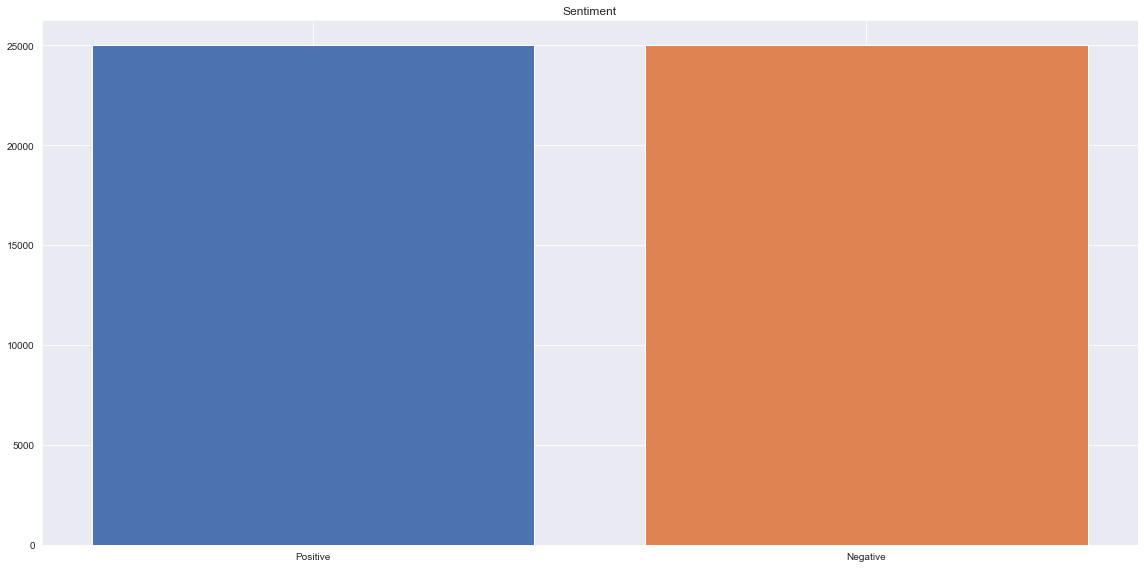

In [13]:
# Plotting the review types ratios

colors = sns.color_palette('deep')

plt.figure(figsize=(16,8), tight_layout=True)

plt.bar(x = ['Positive', 'Negative'],
        height = df_review_imb.value_counts(['sentiment']),
        color = colors[:2])

plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

In [14]:
# If Balancing Done

In [15]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_imb,test_size =0.33,random_state=42)

In [16]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [17]:
train_y.value_counts()

negative    16781
positive    16719
Name: sentiment, dtype: int64

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)

In [19]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,00000000000,00001,000s,001,003830,006,0069,007,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
47973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [21]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


In [22]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

MemoryError: Unable to allocate 21.6 GiB for an array with shape (33500, 86345) and data type float64

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

In [ ]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))

In [ ]:
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
          labels = ['positive','negative'],average=None)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_y,
                           svc.predict(test_x_vector),
                           labels = ['positive', 'negative'])
conf_mat

In [ ]:
print(svc.predict(tfidf.transform([Final_Text_Output])))

In [ ]:
# Image_Path = 'Screen Shot.jpg'
# Image_Path = 'Movie Review.jpg'
# Image_Path = 'Brahmastra.jpeg'
# Image_Path = 'Review-3-Neg.jpg'
Image_Path = 'Review-4.jpg'

In [ ]:
Image(Image_Path)

In [ ]:
result = reader.readtext(Image_Path)
result

In [ ]:
Final_Text_Output = ""

for i in result:
    Final_Text_Output += i[1] + " "

In [ ]:
Final_Text_Output

In [ ]:
img = cv2.imread(Image_Path)

for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    
    text = detection[1] 
    font = cv2.FONT_HERSHEY_SIMPLEX
    img  = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    img  = cv2.putText(img, text, top_left, font, 0.05, (255, 255, 255), 2, cv2.LINE_AA)
    
plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])


df_review_bal

In [ ]:
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))